In [16]:
from IPython.display import Image

### Tarefas

- Introducción: Descrever por encima o projeto
- Modelagem do problema
 - Descrever o map.py (Que é #, espaço etc) Imagen dos mapas. (Mapas com pontos e sem)
- O como funçõa cada estrategia (Copiar e colar función codigo) (BFS, DFS, A*1, A*2, LBS, HILL). 
    - Descrever por cima. 
    - Limitaçoes da estrategia
- How to execute?
- Resultados 
- Conclución


# Astar Estrategy (A*)

This solution employs the best first graph search or greedy search, thus the node expansions are giving by lowest scores first policy.

This policy sort the nodes employ a mechanism that minimizes the function f(n).
For example, the breadth-first search occurs when f(n)=node.depth. 

Moreover, the function f(n) "memorize" the nodes previously computed, in order to examine the f values and recover the path. 


The followig code show the implementation of the best first graph search:

In [10]:
def best_first_graph_search(problem, f, display=False):
    # Nodes in cache
    f = memoize(f, 'f') 
    node = Node(problem.initial)
    # Priority queue giving by the lowest score in f(n)=g(n)+h(n)
    frontier = PriorityQueue('min', f)
    # Initial node
    frontier.append(node)
    explored = set()
    # While node goal different goal state
    while frontier:
        node = frontier.pop()
        # If node goal equal node state, return node
        if problem.goal_test(node.state):
            if display:
                print(len(explored), "paths have been expanded and", len(frontier), "paths remain in the frontier")
            return node
        # else, add node to the priority queue
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
            elif child in frontier:
                if f(child) < frontier[child]:
                    del frontier[child]
                    frontier.append(child)
    return None

def Astar(problem, display=False):
    h = None
    h = memoize(h or problem.h, 'h')
    fn = n.path_cost + h(n)
    
    return best_first_graph_search(problem, lambda n: fn, display)
   

The astar strategy tries to expand the **node**, which is closest to the goal, and also it considers the cost to reach that **node**. This expansion policy means that the f fucntions depends on two values.

Thus, the evaluation of the nodes is done employing the function f(n):

f(n) = g(n) + h(n)
    - g(n): cost to reach each node
    - h(n): cost to get from the node to the goal
    
In this project, the g(n) is equal to the path cost.

 The path cost of this solution increse in 1 when the state change by an action. 
 
 Thus, the costs is uniform for every step in the path, since all step have the same value.

In [ ]:
   def path_cost(self, c, state1, action, state2):
        return c + 1

Also. the node evaluation is giving by a heuristic h(n), which assumes that the node closest to the goal is the faster solution. 

The following sections show the two heuristics employed in this project.

## Astar One (A*1)

The A*1 heruristic employ euclidean distance, which calcualtes straight line distance in a cartesian map. 

Thus, h1(n) is calculated as:

In [29]:
def h1(self, node):
    return node.state.getDistance()
    
def getDistance(self):
    v = distance.euclidean(self.pos, self.goal)
    return v

The A search is complete and optimal when the function h(n) satisfies the following conditions:

Consistent heuristic: $$h(n) \leq  c(n, a, n') + h(n')$$ 


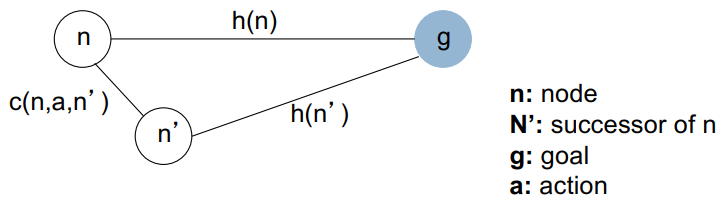

In [21]:
Image("img/consistent.png", width=500, height=300)

In this case, the steps between the actual free space and the goal space never can be longer than the
euclidean distance.

If

 - h(n) = euclidean distance from node n to goal g 
 - h(n') : euclidean distance from node n' to goal g
 - c(n, a, n') = 1

This heuristic wich employ the euclidean distance is a consistent heristic due to in the best case, when the actions to go from n to n' decrese the path in 1 step. We have that the c(n, a, n') + h(n') is equal to h(n).


 
 

## Astar One (A*2)

The A*2 heruristic employ euclidean distance combined with a distance to reach a near point.

Thus, h2(n) is calculated as:

If
- a = euclidean distance from none n to goal g 
- b = euclidean distance from node n to the nearest point p
- c = euclidean distance that point p to the goal g
- v = b + c


As shown the following figure

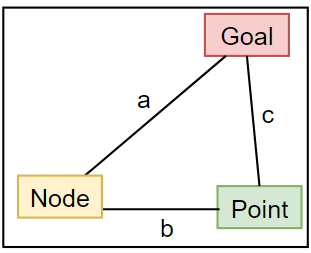

In [28]:
Image("img/h2.png", width=300, height=300)

The heusitics considers v, as the disntace eclidian distance to go from the Node n to the Point and after to the Goal.
These distances satisfy the following inequality: 

$$ a \leq b + c$$

$$ a \leq v$$

However, the distance c is mapped to a smaller value equal to a, with the aim that the node considers the point and that the heristica be be consistent. 

The steps to calculate h2 are explained below

- Find the distance from the node n to the nearest point p (distance b). Subsequently, calculate the distance from that point p to the goal g (distance c).
- If there are no more points on the map, it employs the euclidian distance between the node n and the goal g (distance a), equal to h1.
- Calculate x as the division between a and v. The value of x is a number between 0 to 1 since a is always less or equal than c. Thus, when the node is closer to the point x value will approach to 1.

$$ x = \frac{a}{v} = \frac{a}{b+c}: 0 < x \leq 1 $$

- Calculate the complement of x a in order to penalize the distance c. Thus a higher the distance to c, the value of x will approach 1.

$$ x' = 1 - x $$

- Finally, we consider x value as a percentage of c. The heuristic is consistent the calculated value need to be higher than c; then we add c to the percentage previously calculated as:

$$ h_2 = c + c\cdot(1-x): c < h_2 < 2 \cdot c$$



In [30]:
def h2(self, node):
    return node.state.getDistancePoints()

def getDistancePoints(self):
    points = self.getPointsLeft()
    # print(points)
    dis_Pos_Goal = distance.euclidean(self.pos, self.goal)
    dis_Pos_Point = distance.euclidean(self.pos, self.goal)
    dis_Point_Goal = 0
    valeu = 0
    x = 0.0

    if(len(points)==0):
        valeu =  dis_Pos_Goal
    else:
        # Find the distance of the closest point
        for ip in points:
            if distance.euclidean(self.pos, ip) < dis_Pos_Point:
                dis_Pos_Point = distance.euclidean(self.pos, ip)
                dis_Point_Goal = distance.euclidean(ip, self.goal)
        
        # Calculate v
        v = dis_Pos_Point + dis_Point_Goal
        if dis_Pos_Point == 1:
            v=0
        if(v>0):
            x = dis_Pos_Goal/v
        else:
            x = 1
        # Calculate h2
        valeu = dis_Pos_Goal + dis_Pos_Goal*(1-x)
    return valeu

# Performance Evaluation

In this section, we assess the performance of the bfs, dfs, A*1, A*2, and lbs strategies by using the aima library, developed in python.  The simulation implements the Pacman game in diverse scenarios (dense and no dense).  This simulation also evaluates the strategies employing diverse metrics.  The simulated results were validated extensively.

## Simulation Model and Setup

## Simulation Results and Discussion

The figures presented in this section show the mean values derived  from  10  independent  replications and a confidence intervals of 95%. 

We compared the strategies in terms of:
- simulated time
- number of generated nodes
- number of points win
- number of points left
- number of actions or step to go from initial position to the go
- number of expanded nodes
- number of nodes generated nodes per second
- number of expanded nodes per second

This metric was observed into dense and non-dense scenarios.For  the  sake  of clearness confidence intervals are omitte, we analyze only the scenarios with points. The rest of the results (no-points scenarios) have similar values.

### Number of actions:

If we look at the graphs titled "Number of actions to the goal in function of the size of the map", for both dense and no dense maps, we notice that the local beam search finds a path that is systematically longer than the others found by other methods, except for the depth-first search. Also, the path to the goal, according to the local beam search, increases with the size of the map. Those results confirm our initial expectations. The local beam search is mainly concerned in maximizing its objective function (collecting the maximum number of points). The path to the goal is irrelevant.


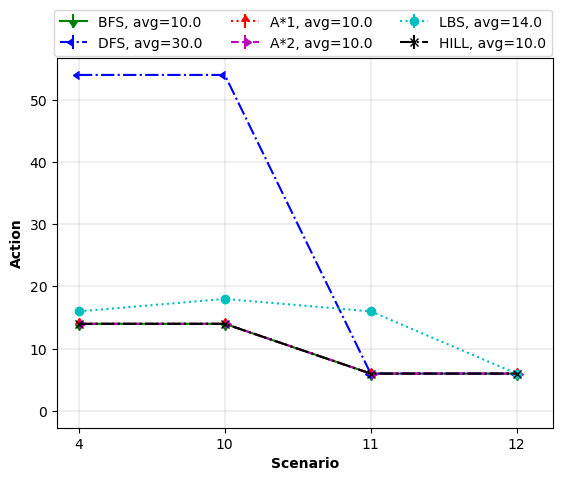

In [48]:
Image("plots/with_points/nodense_acti.png", width=400, height=400)






Clonclution: Finding a solution

In most cases, for the various maps, the search method finds a solution for a value of k usually equal to 10 (for small and most medium-sized maps).

However for much bigger maps, the search method finds a solution only if we set a large value of the width k. This means that the search wasted time finding a solution with previously lower values of k. This is the first critic of this method, the person implementing the local beam search has to know the problem at hand deeply to select an adequate value for k. We could have simulated the local beam search on various maps, with different sizes and number of points, to find "rules" to select an appropriate width range for k. However, this wouldn't have been an "elegant" implementation for this algorithm and more importantly we don't have any information about the map initially. We preferred, in this problem, to adopt the most simpler option, increamenting the value of k until the local beam search finds a solution. 

For more complex problems in general, we could keep in memory the number of possibilities at each time we expand new successors. If we don't find a solution initially, that memorized number could help us select an adequate value of the next width to set in order to increase the probability of finding a solution. 

**Points collected:**

If we look at the map titled "Number of points for each map", it describes the average number of points collected by each search method over increasing sizes of the map. As expected, the local beam search is very efficient at collecting points on everage (5.8 points collected). It surpasses the other search methods on this metric, for maps that are relatively dense in terms of walls inside it.
However, as the map gets bigger, the average number of points colleted decreases. In fact, with increasing size, while keeping the total number of points available to collect constant (10 points), the number of nodes expanded gets much bigger, it becomes less probable to find points inside the expanded nodes. Especially if the points are dispersed over the map. If the map isn't dense, the local beam search is even less optimal for collecting points, for the same reasons discussed previously. 






**Memory used:**

The graph, titled "Nodes in function of the map", measures the total memory used to perform each search method by counting the total number of nodes kept during the search to find a solution. Since it selects k best successors every time new nodes are expanded, the memory required by the local beam search is bounded by the width k. As a consequence, for both dense and empty maps, the local beam search required an average memory size compared to the other methods for finding a solution. The only exception to that is for map 11 and 12. Much bigger values of k (50 and 285 respectively), and as a consequence a much higher memory, were necessary to find a solution. Since those maps are empty, the number of new successors, when new nodes are expanded, from which to select a set of k best successors increases exponentially to the order of 3 to the N inside the map. For values of k below 50 and 285, for the maps 11 and 12, the lists of nodes selected are trapped in the bottom half of the map.  



**Time to execute the search:**

If we look at the graph titled "Time in function of the scenario", for dense maps, this plot presents the time each search method took to find a solution, according the size of the map. In general, the execution time increases exponentially with the size of the map. We can find the reason by looking at the graph measuring the nodes per second, and expanded nodes per second. As the map increases in size, those metrics decrease dramatically. In fact, the difference between the different search methods  according  to the complexity, type and number of operation(s), every time new nodes are expanded, get even more obvious with increasing map size.

The local beam search has a relatively average execution time compared to the other methods. In the case of empty maps, the number of successors increases exponentially (to the order of 3 to the n, in the middle of the maze, far from the walls), when we increase the map size (map size is the same for map 4 and 10, only the distribution of points is different). For the map 11 and 12, the time increased much dramatically. In fact, for those two maps, an iteration over the width k was necessary in order to find a solution (k=50 for map 11 and k=285 for map12). Incrementing the value of k by 5 on each iteration, from an inial value of 10, until reaching an optimal value of k=50 for map 11 and k=285 for map 12, slowed down the local beam search method. We can note here that it is difficult to choose a "good" value for k, map 11 and 12 have exactly the same size, only their structure is different, but the difference in value of the search width is of the order of almost 6.    



**Maps with no points:**

We won't discuss the results of the local beam search on maps with no points to collect. Given the objective of this method and the way it is implemented, discussing its results with the objective function set to 0 over the map makes no sense.